In [1]:
!pip install wbdata

In [4]:
import pandas as pd
import wbdata


In [9]:
import wbdata
import pandas as pd

indicator = {
    'SP.POP.TOTL': 'Total_Population',
    'SM.POP.NETM': 'Net_Navigatore'
}

countries = ['IN', 'PK', 'BD', 'LK', 'AF', 'NZ', 'SA']

# Old version compatible call
data = wbdata.get_dataframe(indicator, country=countries)

data.reset_index(inplace=True)

# Check actual column names first
print(data.columns)

# Rename with correct spellings
data.rename(columns={'country': 'Country', 'date': 'Year'}, inplace=True)

data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data[(data['Year'] >= 1950) & (data['Year'] <= 2021)]

data.to_csv('Population_&_Navigatore.csv', index=False)


print("=== Loaded Data ===")
print(data.head(10))


Index(['country', 'date', 'Total_Population', 'Net_Navigatore'], dtype='object')
=== Loaded Data ===
        Country  Year  Total_Population  Net_Navigatore
3   Afghanistan  2021        40000412.0       -548784.0
4   Afghanistan  2020        39068979.0        143634.0
5   Afghanistan  2019        37856121.0          9159.0
6   Afghanistan  2018        36743039.0        -36753.0
7   Afghanistan  2017        35688935.0        -71491.0
8   Afghanistan  2016        34700612.0       -143049.0
9   Afghanistan  2015        33831764.0       -286314.0
10  Afghanistan  2014        32792523.0        233913.0
11  Afghanistan  2013        31622704.0         18119.0
12  Afghanistan  2012        30560034.0         68628.0


In [10]:
print("=== Dataset Info ===")
print(data.info())

print("\n=== Summary Statistics ===")
print(data.describe())


=== Dataset Info ===
<class 'wbdata.client.DataFrame'>
Index: 434 entries, 3 to 454
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           434 non-null    object 
 1   Year              434 non-null    int64  
 2   Total_Population  434 non-null    float64
 3   Net_Navigatore    434 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 17.0+ KB
None

=== Summary Statistics ===
              Year  Total_Population  Net_Navigatore
count   434.000000      4.340000e+02    4.340000e+02
mean   1990.500000      1.694427e+08   -1.224702e+05
std      17.916183      3.230045e+08    4.285213e+05
min    1960.000000      2.371800e+06   -2.290411e+06
25%    1975.000000      1.093633e+07   -1.942768e+05
50%    1990.500000      2.342427e+07   -1.518350e+04
75%    2006.000000      1.362499e+08    3.237550e+04
max    2021.000000      1.414204e+09    1.197329e+06


In [11]:
print("=== Missing Values Count ===")
print(data.isnull().sum())

=== Missing Values Count ===
Country             0
Year                0
Total_Population    0
Net_Navigatore      0
dtype: int64


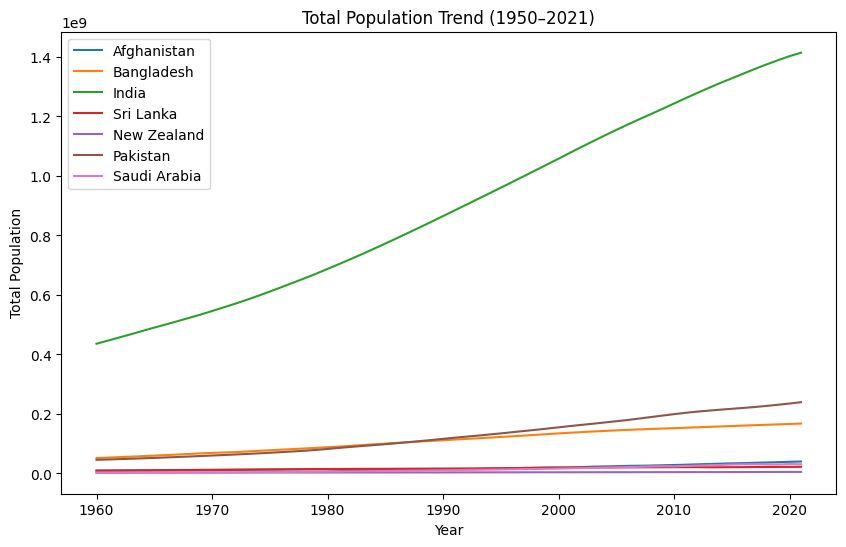

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for country in data['Country'].unique():
    subset = data[data['Country'] == country]
    plt.plot(subset['Year'], subset['Total_Population'], label=country)

plt.title("Total Population Trend (1950–2021)")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.show()


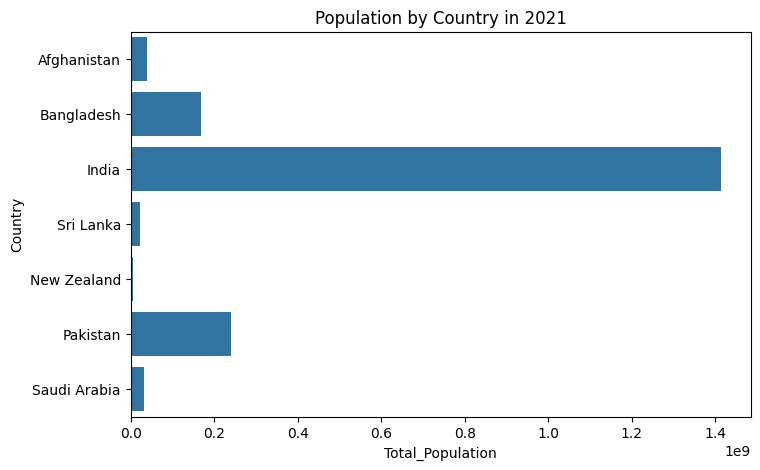

In [13]:
import seaborn as sns

latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]

plt.figure(figsize=(8,5))
sns.barplot(x='Total_Population', y='Country', data=latest_data)
plt.title(f"Population by Country in {latest_year}")
plt.show()


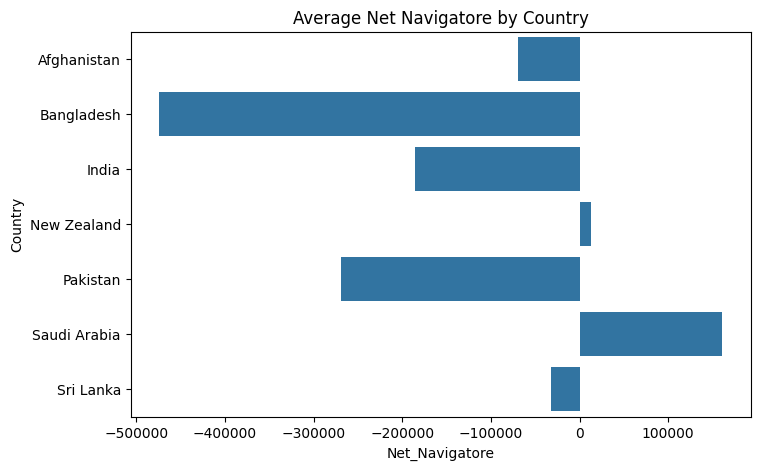

In [14]:
avg_net = data.groupby('Country')['Net_Navigatore'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Net_Navigatore', y='Country', data=avg_net)
plt.title("Average Net Navigatore by Country")
plt.show()


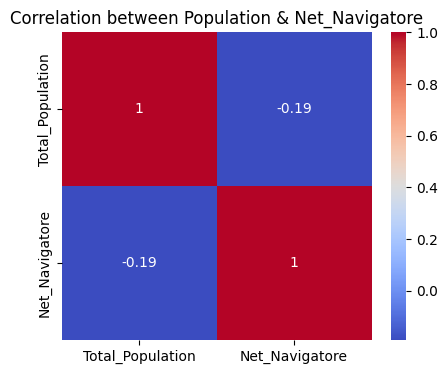

In [15]:
numeric_cols = ['Total_Population', 'Net_Navigatore']
corr = data[numeric_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Population & Net_Navigatore")
plt.show()
